In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Rescaling# type: ignore
from keras.utils import image_dataset_from_directory,img_to_array,array_to_img,load_img # type: ignore

In [35]:
train_data = 'data/train'
val_data = 'data/val'
pred_data = 'data/predict'

img_width = 180
img_height = 180
batch_size = 16

In [36]:
train = image_dataset_from_directory(
    train_data,
    batch_size = batch_size,
    image_size =(img_width,img_height) 

)
class_names = train.class_names
print("Available classes: ", class_names )

Found 1611 files belonging to 7 classes.
Available classes:  ['Apple', 'Banana', 'avocado', 'mango', 'orange', 'pinenapple', 'watermelon']


In [37]:
val = image_dataset_from_directory(
    val_data,
    batch_size = batch_size,
    image_size =(img_width,img_height),
    validation_split = False

)

Found 712 files belonging to 7 classes.


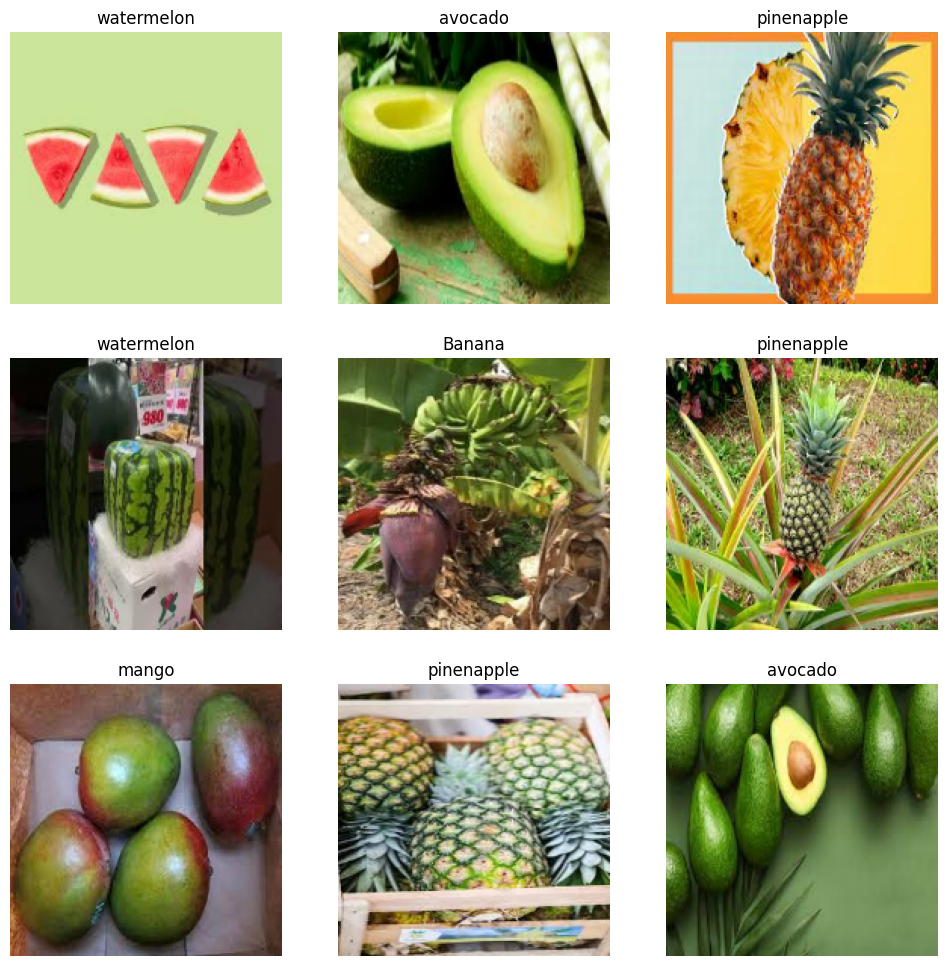

In [38]:
#plot data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,12))
for image , labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1) 
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')


plt.show()        


In [47]:
model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(16,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam', 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])


In [48]:
history = model.fit(train,epochs=15,validation_data=val)
model.save("fruits.keras")

Epoch 1/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 307ms/step - accuracy: 0.1551 - loss: 1.9151 - val_accuracy: 0.3118 - val_loss: 1.6141
Epoch 2/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.3943 - loss: 1.4740 - val_accuracy: 0.3483 - val_loss: 1.5204
Epoch 3/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.4628 - loss: 1.2639 - val_accuracy: 0.3947 - val_loss: 1.5195
Epoch 4/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.4882 - loss: 1.2198 - val_accuracy: 0.4171 - val_loss: 1.4295
Epoch 5/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.5532 - loss: 1.1467 - val_accuracy: 0.4185 - val_loss: 1.4085
Epoch 6/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.6104 - loss: 1.0011 - val_accuracy: 0.4438 - val_loss: 1.3768
Epoch 7/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.6541 - loss: 0.9179 - val_accuracy: 0.5028 - val_loss: 1.4677
Epoch 8/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.6915 - loss: 0

In [7]:
from keras.models import load_model
model = load_model("fruits.keras")
class_names = ['Apple', 'Banana', 'Avocado', 'Mango', 'Orange', 'Pineapple', 'Watermelon']
img_width,img_height=180,180
img = 'img_31.jpeg'
img = load_img(img,target_size=(img_width,img_height))
img_arr = array_to_img(img)
img_1 = tf.expand_dims(img_arr,0)
prediction = model.predict(img_1)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[[1.4455568e-03 3.0564934e-02 4.9037942e-01 8.6275227e-02 9.9438964e-04
  6.1583737e-06 3.9033428e-01]]


In [8]:
import numpy as np
pred_idx=np.argmax(prediction)
class_names[pred_idx]

'Avocado'

In [30]:
pred = image_dataset_from_directory(
    pred_data,
    batch_size = batch_size,
    image_size =(img_width,img_height) 

)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory data/predict. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
model.evaluate(pred)